In [159]:
# Reference ~ https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us
import pandas as pd
import re

df = pd.read_csv('alldata.csv')

# Dataset provided contained positions that were not necessarily data science related so need to filter those out, even though
# we may encounter some false negatives of postings that could actually have been for data science applicants
df['position'].fillna('NA', inplace=True)
df_data = df[df['position'].str.contains('data scientist', regex=True, flags=re.IGNORECASE)].reset_index(drop=True)

df_data['zip_code'] = df_data['location'].str.extract('(\d+)')

df_data['location'] = df_data['location'].str.extract('(\D+)')

city_state = pd.DataFrame(df_data.location.str.split(',',1).tolist(),
                                   columns = ['city','state'])

df_data.drop(['location'], axis=1, inplace=True)
df = pd.concat([df_data, city_state], axis=1)


df['description'] = df['description'].apply(lambda x: re.sub('[^\w\s]','', x))
df['description'] = df['description'].replace('\n', ' ', regex=True)

In [204]:
tool_list = ['python', ' r ', 'sql','java','scala','excel', 'mapreduce', 'hive', 'hbase', 'git',
               'aws','hadoop','spark','unix','tableau','sas', 'bash', 'bigquery', 'scikitlearn'
               'linux','sas','hive','oracle','perl', 'scipy', 'postgres', 'jquery', 'd3'
               'mysql','matlab','javascript','tensorflow','spss','mongodb', 'scala', 'pig', 'pyspark']
skills_list = ['machine learning','data analysis','data visualization', ' eda ',
            'modeling','statistical analysis','research','deep learning', 'statistical knowledge',
            'optimization','decision tree','logistic','random forest', ' nlp ',
            'ab testing','web scraping','neural network','interpersonal skills',
            'communication skills','artificial intelligence', ' etl ', 'metrics', 'recommendations', 'product analaytics']
degree_list = [' master ', ' masters ', ' phd ', ' bachelor ', ' bachelors ' ' ms ', ' bs ', 'doctorate', ' ba ']

                
def get_frequency(lst):
    val_dict = {}
    for row in df['description']:
        for item in lst:
            if item in row.lower():
                # To store as key value we need to get rid of whitespace
                item2 = item.replace(' ', '-')
                val_dict[item2] = val_dict.get(item2, 0) + 1
    return val_dict

skills_dict = get_frequency(skills_list)
tools_dict = get_frequency(tool_list)
degree_dict = get_frequency(degree_list)

new_degree_dict = {}
for key in degree_dict:
    if key in ['-masters-', '-master-']: 
        new_degree_dict['masters'] = new_degree_dict.get('masters', 0) + degree_dict[key]
    elif key in ['-phd-', 'doctorate']:
        new_degree_dict['phd'] = new_degree_dict.get('phd', 0) + degree_dict[key]
    elif key in ['-bachelor-', '-bs-', '-ba-']:
        new_degree_dict['bachelors'] = new_degree_dict.get('bachelors', 0) + degree_dict[key]


{'masters': 428, 'phd': 552, 'bachelors': 132}
{'-masters-': 372, '-phd-': 542, '-bs-': 102, '-bachelor-': 16, '-master-': 56, '-ba-': 14, 'doctorate': 10}


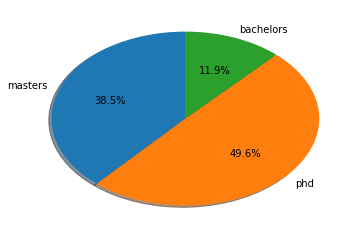

<module 'matplotlib.pyplot' from '/Users/andreilyskov/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [212]:
import matplotlib.pyplot as plt

plt.pie(x=new_degree_dict.values(), labels=list(new_degree_dict.keys()), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()
plt


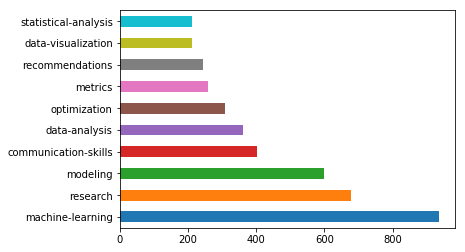

In [228]:
skills_df = pd.DataFrame.from_dict(skills_dict, orient='index')

skills_df[0].sort_values(ascending=False)[0:10].plot(kind='barh')

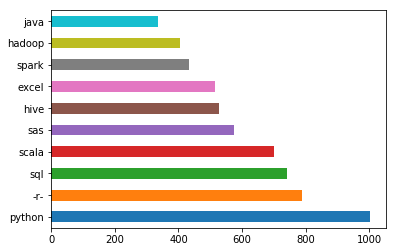

In [229]:
tools_df = pd.DataFrame.from_dict(tools_dict, orient='index')

tools_df[0].sort_values(ascending=False)[0:10].plot(kind='barh')